## TASK - Regression task to predict the percentage of marks that a student is expected to                         score based upon the number of hours they studied. 
##              Simple linear regression task as it involves just two variables.

In [1]:
#Importing Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  

In [2]:
df=pd.read_excel("C:\\Users\\Avirup\\Documents\\Python_datasets\\Score.xlsx")

In [3]:
#Data Cleaning

df['Hours']=df['Hours,Scores'].apply(lambda x: x.split(',')[0]) 
df['Scores']=df['Hours,Scores'].apply(lambda x: x.split(',')[1]) 

In [4]:
df.drop(['Hours,Scores'],axis=1,inplace=True)

In [5]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


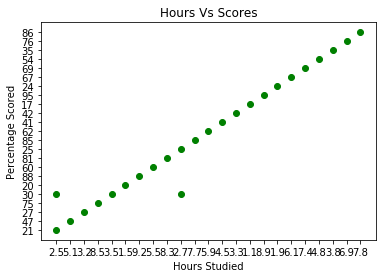

In [6]:
plt.scatter(df.Hours, df.Scores, color='green')
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

In [7]:
### Reshaping the dataset

X=df.iloc[:, 0].values.reshape(-1,1)
Y=df.iloc[:, 1].values.reshape(-1,1)

### REGRESSION

In [8]:
reg=LinearRegression()

In [9]:
model=reg.fit(X,Y)

In [10]:
hrs=np.array([[9.25]])

In [11]:
Y_predicted_values=model.predict(X)

In [12]:
Y_predict=model.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(Y_predict[[0]]))

No of Hours = [[9.25]]
Predicted Score = [[92.90985477]]


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y,Y_predicted_values)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y,Y_predicted_values))

Mean Absolute Error: 4.972805319866375
Mean Squared Error: 28.88273050924546


### ALTERNATIVE METHOD BY SPLITTING DATASET and then REGRESSION

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
Y_prediction = regressor.predict(X_test)

In [16]:
new_prediction = regressor.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(new_prediction[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_prediction))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
